# RQ2: What is the role of the prompt in the creativity of the generated text?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import matplotlib

# Configurar la fuente de toda la figura en Times New Roman
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

In [2]:
df = pd.read_csv('data/expert_assessment.csv')


In [3]:
cols_study = ['1_attractive_style', '1_attractive_theme', '2_originality_style', '2_originality_theme', '4_creativity_synopsis', '6_anthology', '6_own_voice']

In [4]:
df['title_writer'].unique()

array(['patricio', 'machine'], dtype=object)

In [5]:
def select_title_df(df, writer, df_new):
    df_filtered = copy.copy(df[df['title_writer']==writer]).reset_index()
    dic_writers = {'patricio':'Human', 'machine':'GPT4'}
    writer = dic_writers[writer]
    df_new[f'Title Attractiveness {writer}'] = df_filtered['1_attractive_title'] + 1 
    df_new[f'Title Originality {writer}'] = df_filtered['2_originality_title'] + 1 
    df_new[f'Title Creativity {writer}'] = df_filtered['4_creativity_title'] + 1 
    return df_new

In [6]:
df_new = pd.DataFrame()
select_title_df(df, 'patricio', df_new)
select_title_df(df, 'machine', df_new)
df_new

,Title Attractiveness Human,Title Originality Human,Title Creativity Human,Title Attractiveness GPT4,Title Originality GPT4,Title Creativity GPT4
0,3,3,3,1,1,1
1,2,3,2,3,3,3
2,3,3,3,3,3,3
3,3,3,2,3,2,1
4,2,2,1,1,1,1
...,...,...,...,...,...,...
355,3,3,3,2,2,2
356,2,2,1,1,1,1
357,3,2,2,2,2,2
358,3,2,1,1,2,2


In [7]:
df_new.columns

Index(['Title Attractiveness Human', 'Title Originality Human',
       'Title Creativity Human', 'Title Attractiveness GPT4',
       'Title Originality GPT4', 'Title Creativity GPT4'],
      dtype='object')

In [8]:
cols = ['Title Attractiveness Human',
       'Title Attractiveness GPT4', 'Title Originality Human',
       'Title Originality GPT4', 'Title Creativity Human',
       'Title Creativity GPT4']
df_new = df_new[cols]

c:\Users\gmarc\anaconda3\envs\nlp2\Lib\site-packages\plot_likert\plot_likert.py:262: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\gmarc\anaconda3\envs\nlp2\Lib\site-packages\plot_likert\plot_likert.py:315: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


EEEH 0.0 152.54166666666666
-2.0000000000000004 148.54166666666666
100.00000000000001
                                    1          2          3         4
Title Attractiveness Human  10.000000  37.777778  46.111111  6.111111
Title Attractiveness GPT4   40.555556  40.277778  18.611111  0.555556
Title Originality Human      6.944444  36.111111  50.277778  6.666667
Title Originality GPT4      38.055556  47.777778  14.166667  0.000000
Title Creativity Human      15.833333  36.666667  42.222222  5.277778
Title Creativity GPT4       51.111111  37.222222  11.111111  0.555556


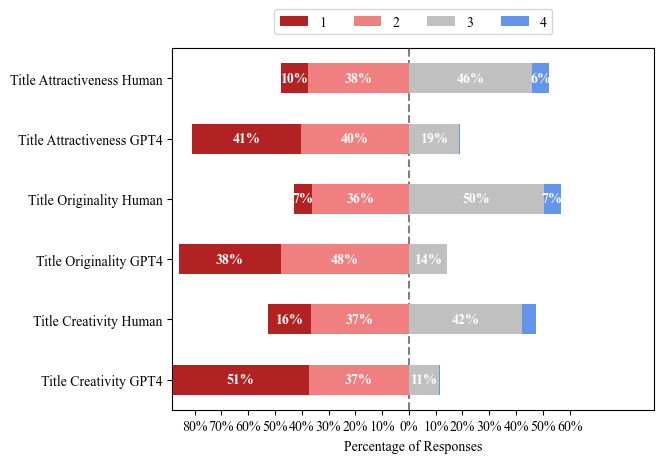

In [9]:
# Imprimir el diccionario
import plot_likert

ax = plot_likert.plot_likert(df_new, 
                        [1,2,3,4],
                        plot_percentage=True,
                        bar_labels=True,
                     colors=plot_likert.colors.default_with_darker_neutral,
                     figsize=(7,5))
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=4, title='')
plt.tight_layout(pad=2.0)
# Ajustar el tamaño de las fuentes
plt.rc('font', size=9)          # Texto general
plt.rc('axes', titlesize=14)     # Título de los ejes
plt.rc('axes', labelsize=14)     # Etiquetas de los ejes
plt.rc('xtick', labelsize=14)    # Etiquetas del eje x
plt.rc('ytick', labelsize=14)    # Etiquetas del eje y
plt.rc('legend', fontsize=14)    # Texto de la leyenda
plt.savefig('figures/RQ2_titles_comparison.pdf', backend='pgf')
plt.show()

### Diagrama radial

Este diagrama nos permite ver quién "gana" de media. 

In [10]:
map_gpt = {'gpt4_es':'GPT4','gpt4_en':'GPT4', 'patricio':'Patricio'}
df['sinopsis_author_general'] = df['synopsis_writer'].apply(lambda x: map_gpt[x])

In [11]:
gpt_sinopsis = df[df['sinopsis_author_general']=='GPT4']
gpt_title_by_patricio = copy.copy(gpt_sinopsis[gpt_sinopsis.title_writer=='patricio'].reset_index(drop=True))
gpt_title_by_gpt = copy.copy(gpt_sinopsis[gpt_sinopsis.title_writer=='machine'].reset_index(drop=True))

In [12]:
patricio_sinopsis = df[df['sinopsis_author_general']=='Patricio']
patricio_title_by_patricio = copy.copy(patricio_sinopsis[patricio_sinopsis.title_writer=='patricio'].reset_index(drop=True))
patricio_title_by_gpt = copy.copy(patricio_sinopsis[patricio_sinopsis.title_writer=='machine'].reset_index(drop=True))

In [13]:
def extraer_prefijos(lista_cadenas):
    prefijos = []
    for cadena in lista_cadenas:
        if '__' in cadena:
            prefijo = cadena.split('__')[0]
            prefijos.append(prefijo)
        else:
            prefijos.append(cadena)
    return prefijos

def generate_df_radial_plot(df_dict):
    df_radial_plot = pd.DataFrame()
    for key, value in df_dict.items():
        value.columns = extraer_prefijos(value)
        df_radial_plot[key] = value.transpose()['mean']
    df_radial_plot = df_radial_plot.transpose()
    return df_radial_plot

In [14]:
map_labels = {
    '1_attractive_style':'Style Attractiveness',
    '1_attractive_theme':'Theme Attractiveness',
    '2_originality_style':'Style Originality',
    '2_originality_theme':'Theme Originality',
    '4_creativity_synopsis':'Creativity',
    '6_own_voice':'Own Voice', 
    '6_anthology':'Anthology'}

def mapear_lista_con_diccionario(lista, diccionario):
    return [diccionario[clave] for clave in lista]

In [15]:
map_labels.keys()

dict_keys(['1_attractive_style', '1_attractive_theme', '2_originality_style', '2_originality_theme', '4_creativity_synopsis', '6_own_voice', '6_anthology'])

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asegúrate de cargar tu DataFrame aquí, por ejemplo:
# df_radial_plot = pd.read_csv("path_to_your_file.csv")

def radio_plot(df_radial_plot):
    # Preparar datos para el plot
    categories = mapear_lista_con_diccionario(list(df_radial_plot.columns), map_labels)
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Añadir el primer ángulo al final para cerrar el plot
    angles += angles[:1]

    # Crear el plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Dibujar cada fila del DataFrame como una línea en el plot
    for i, (name, row) in enumerate(df_radial_plot.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # Añadir el primer valor al final para cerrar el plot correctamente
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=name)
        #ax.scatter(angles, values, s=50)  # Agregar puntos en las esquinas del radio

    # Agregar las etiquetas
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=13)  # Ajustar el tamaño de las etiquetas

    # Ajustar el espaciado entre las etiquetas
    ax.tick_params(axis='x', pad=25)
    ax.tick_params(axis='y', labelsize=12)  # Ajustar el tamaño de los números

    #ax.set_ylim(0,2)

    # Colocar la leyenda arriba centrada
    ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.35), ncol=2, fontsize=12)  # Ajustar el tamaño de la leyenda

    # Guardar la figura en PDF

    # Colocar la leyenda fuera del gráfico para evitar solapamientos
    plt.tight_layout(pad=0.5)
    
    plt.savefig('figures/RQ2_radar_plot.pdf', format='pdf', backend='pgf', bbox_inches='tight')

    # Mostrar el plot
    plt.show()

# Llamar a la función con el DataFrame cargado
# radio_plot(df_radial_plot)


In [17]:
describe_gpt_title_by_patricio = gpt_title_by_patricio.describe()[cols_study]
describe_patricio_title_by_patricio = patricio_title_by_patricio.describe().iloc[:,1:][cols_study]

describe_patricio_title_by_gpt = patricio_title_by_gpt.describe().iloc[:,1:][cols_study]
describe_gpt_title_by_gpt = gpt_title_by_gpt.describe().iloc[:,1:][cols_study]


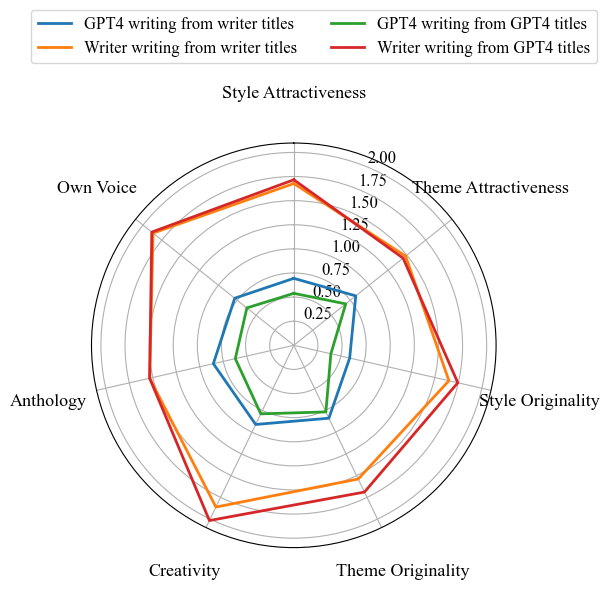

In [18]:
df_radial = generate_df_radial_plot({'GPT4 writing from writer titles': describe_gpt_title_by_patricio,
                                    'Writer writing from writer titles': describe_patricio_title_by_patricio,
                                    'GPT4 writing from GPT4 titles': describe_gpt_title_by_gpt,
                                    'Writer writing from GPT4 titles': describe_patricio_title_by_gpt,
                                    })
radio_plot(df_radial)

In [19]:
df_radial

,1_attractive_style,1_attractive_theme,2_originality_style,2_originality_theme,4_creativity_synopsis,6_anthology,6_own_voice
GPT4 writing from writer titles,0.694444,0.822222,0.594444,0.838889,0.911111,0.855556,0.783333
Writer writing from writer titles,1.677778,1.483333,1.650000,1.538889,1.861111,1.533333,1.866667
GPT4 writing from GPT4 titles,0.538889,0.688889,0.394444,0.766667,0.788889,0.622222,0.622222
Writer writing from GPT4 titles,1.716667,1.450000,1.744444,1.688889,2.016667,1.533333,1.883333
